In [22]:
# 1. IMPORT LIBRARY
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk resampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Setup
sns.set(style="whitegrid")
%matplotlib inline

In [23]:
# 2. LOAD DATA
orders = pd.read_csv('../data/olist_orders_dataset.csv')
customers = pd.read_csv('../data/olist_customers_dataset.csv')

# Merge untuk dapatkan customer_unique_id
orders_customers = orders.merge(customers, on='customer_id', how='left')

# Hitung jumlah order per unique customer
order_counts = orders_customers.groupby('customer_unique_id')['order_id'].nunique().reset_index()
order_counts.columns = ['customer_unique_id', 'num_orders']

# Buat label repeat_order
order_counts['repeat_order'] = order_counts['num_orders'].apply(lambda x: 1 if x > 1 else 0)


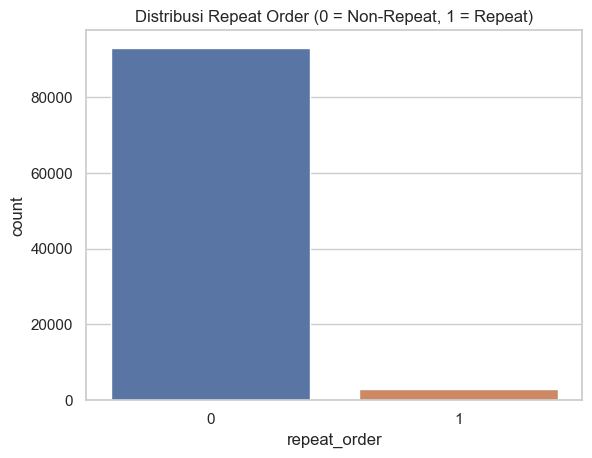

repeat_order
0    93099
1     2997
Name: count, dtype: int64


In [24]:
# 3. CEK DISTRIBUSI LABEL
sns.countplot(x='repeat_order', data=order_counts)
plt.title("Distribusi Repeat Order (0 = Non-Repeat, 1 = Repeat)")
plt.show()

# Proporsi
print(order_counts['repeat_order'].value_counts(normalize=False))


In [25]:
# 4. SIMPAN LABEL UNTUK NANTI
order_counts.to_csv('../data/repeat_order_labels.csv', index=False)

C:\Users\Gede Darmawan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


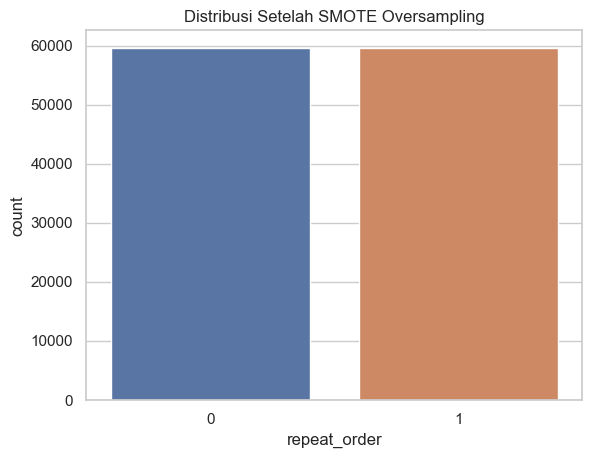

In [26]:
# 5. CONTOH BALANCING: SMOTE (jika sudah punya fitur RFM)

# Load fitur hasil feature engineering
rfm = pd.read_csv('../data/rfm_features_train.csv')  # asumsikan sudah dibuat
rfm_label = rfm.merge(order_counts[['customer_unique_id', 'repeat_order']], on='customer_unique_id')

# Drop ID
X = rfm_label.drop(columns=['customer_unique_id', 'repeat_order'])
y = rfm_label['repeat_order']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Visualisasi distribusi baru
sns.countplot(x=y_resampled)
plt.title("Distribusi Setelah SMOTE Oversampling")
plt.show()
